In [1]:
%reload_ext autoreload

# Imports

import os
import sys
module_path = os.path.abspath(os.path.join('../image_gen_dm')) # or the path to your source code
sys.path.append(str(module_path))

import matplotlib.pyplot as plt
import pandas as pd

TF_ENABLE_ONEDNN_OPTS=0
os.environ['TF_ENABLE_ONEDNN_OPTS'] = str(TF_ENABLE_ONEDNN_OPTS)
os.environ['TG_GPU_ALLOCATOR'] = 'cuda_malloc_async'


In [2]:
FOLDER_PATH = 'res/histories'

files = os.listdir(FOLDER_PATH)

MANUAL_BEST = 11
GRID_BEST = 24


NCD-VAE12 loss:  2582.413475036621
NCD-VAE15 loss:  2582.1614990234375
NCD-VAE16 loss:  2582.2823486328125
NCD-VAE17 loss:  2581.7320861816406
NCD-VAE18 loss:  2582.371269226074
NCD-VAE19 loss:  2582.3642044067383
NCD-VAE20 loss:  2582.3719787597656
NCD-VAE21 loss:  2581.987548828125
NCD-VAE22 loss:  2582.3904190063477
NCD-VAE23 loss:  2582.459785461426
NCD-VAE24 loss:  2583.1138458251953
NCD-VAE25 loss:  2581.449287414551
NCD-VAE26 loss:  2582.012405395508
NCD-VAE27 loss:  2582.261116027832
NCD-VAE28 loss:  2582.2747802734375
NCD-VAE29 loss:  2582.120864868164
NCD-VAE30 loss:  2582.2753372192383


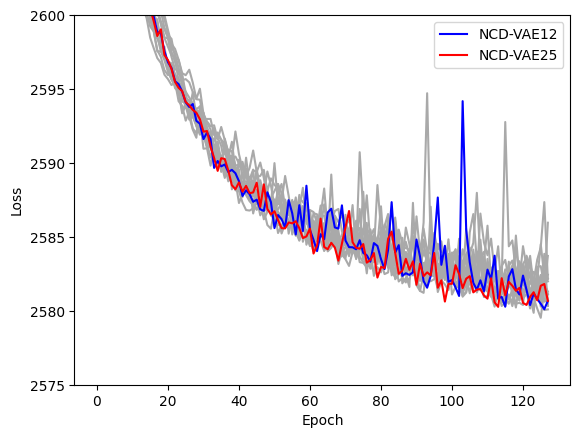

In [5]:
# Plot all histories from csv files in a directory

csv_files = [f for f in files if f.endswith('.csv')]

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.ylim(2575, 2600)

i = 0
for f in csv_files:
    if f.startswith('cvae'):
        continue

    if i > 13 or i is MANUAL_BEST:
        df = pd.read_csv(os.path.join(FOLDER_PATH, f))
        
        df['loss_avg'] = df['loss'].rolling(window=32).mean()

        print(f'NCD-VAE{i+1} loss: ', df['loss_avg'].iloc[-1])

        name = f[:-4]
        if i == MANUAL_BEST or i == GRID_BEST:
            pass
        else:
            plt.plot(df['loss'], label=None, color='darkgray')

    i += 1

df = pd.read_csv(os.path.join(FOLDER_PATH, 'ncvae12.csv'))
plt.plot(df['loss'], label='NCD-VAE12', color='blue')

df = pd.read_csv(os.path.join(FOLDER_PATH, 'ncvae25.csv'))
plt.plot(df['loss'], label='NCD-VAE25', color='red')

plt.legend(loc="upper right")

plt.show()